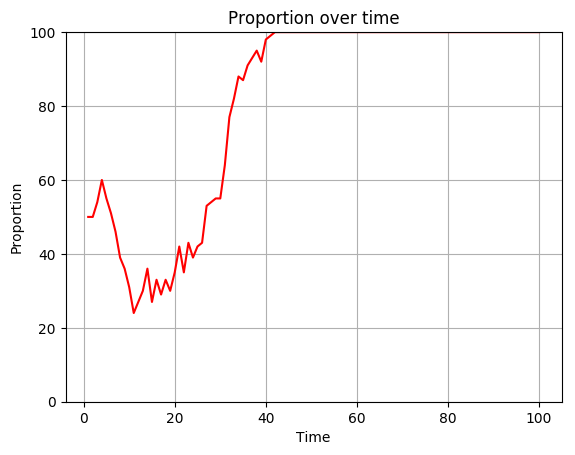

42

In [5]:
using PyPlot

function nextGeneration(vector, proportion)
    """Returns the new vector of population and its characteristic, 
    using the vector of the old generation and its characteristic."""
    newProportion = 0
    for i in 1:length(vector)
        # rand() gives a number in (0,1). Simulation of a random variable following a Bernoulli distribution
        # of parameter "proportion/populationSize"
        if rand() > proportion/length(vector)
            vector[i] = 0
        else
            vector[i] = 1
            newProportion += 1
        end
    end
    return vector, newProportion
end

function nextGenerationSelection(vector, proportion, selectionFactor)
    """Returns the new vector of population and its characteristic, 
    using the vector of the old generation and its characteristic after applying a selection.
    1 is the state that dominates the other. The selection factor is a fixed (float) number."""
    
    #There is a min needed if the proportion after the selection exceeds the size of the population.
    proportionAfterSelection = min(proportion*(1+selectionFactor), length(vector))
    
    #Producing the next generation
    return nextGeneration(vector, proportionAfterSelection)
    
end    

function trajectorySelection(populationSize, initialProportion, selectionFactor, finalTime, booleanPlot)
    """Iteration of the algorithm with a mutation.
    finalTime is how many iterations you do.
    booleanPlot : true if you want to plot the trajectory, false if you do not."""
    
    populationVector = zeros(populationSize)
    listOfProportions = Float64[]
    infTimeAbsorption = 0
    
    # Initializing the population
    for i in 1:length(populationVector)
        if i > initialProportion
            populationVector[i] = 0
        else
            populationVector[i]
        end
    end
    
    # First proportion added to the plot
    push!(listOfProportions, initialProportion)

    for time in 2:finalTime
        
        populationVector, initialProportion = nextGenerationSelection(populationVector, initialProportion, selectionFactor)
        
        # Getting the time of absorption
        if (infTimeAbsorption == 0) && (initialProportion == 0 || initialProportion == populationSize)
            infTimeAbsorption = time
        end
        
        # Adding the proportion to the plot
        push!(listOfProportions, initialProportion)
    end

    
    # Plot
    if (booleanPlot)
        ioff()

        listOfTimes = collect(1:finalTime)

        title("Proportion over time")
        xlabel("Time")
        ylabel("Proportion")
        ylim(0,populationSize)
        grid(true)

        plot(listOfTimes, listOfProportions, color="red")
    end
    
    return infTimeAbsorption
end

time = trajectorySelection(100, 50, 0.01, 100, true)